## Customer Need Assessment Model (Part-2): Graphic, Table and Location Clustering

<p style="text-align: center;">By T. B. Tesema  and Stefan Gucu </p> 

### Summary

The model has been developed on theoretical pizza sales data. Its purpose is to introduce a simple model for customer need assessment. An initial analysis has indicated that the two attributes, orderly, income and age were highly associated with the frequency of customer pizza orders. Data Science methodologies listed below are used for investigations.  Although pizza order data has been utilized for the model development, key attributes used on the model are applicable to most companies, for potential market assessment. The Model Part-1, consisted of relevant visualizations has been published with introduction at  [Github](https://github.com/Tesema-B/Tesema-B/blob/679b05d29c54aebcf94a2fd3921fd7da1a74e9ee/CUSTOMER%20NEED%20ASSESSMENT.ipynb).This is Part-2 Clustering, which involves graphic, table cluster and landscape/location mapping. The publication of Part-3, Multiple Regression and Part-4, Logistic Regression will continue consecutively.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup 
from botocore.client import Config
import ibm_boto3
# import folium # map rendering library

In [2]:
# The code was removed by Watson Studio for sharing.

,Order_ID,Pizza_Type,Zip_Code,Gender,Age,Income,Order_Frequency,Status
0,P000,Cheese,75008,F,20,30,4,V
1,P001,Veggie,75010,M,50,98,10,C
2,P002,Pepperoni,75011,M,36,46,8,C
3,P003,Meat,75012,F,22,35,5,A
4,P004,Margerhita,75013,F,45,85,9,C


Let us add new column called Order_Status with conditions

The Order_Status should be used to determine the status of customer order by designating "low", "medium" or "high".


In [3]:
# Create a list to store the data
Order_Status = []

# For each row in the column,
for row in df['Order_Frequency']:
    # if more than nine,
    if row > 9:
        # Append high
        Order_Status.append('high')
    elif row > 5:
        # Append medium
        Order_Status.append('medium')
    else:
        # if less than five Append low 
        Order_Status.append('low')
        
# Create a column from the list
df['Order_Status'] = Order_Status

df.head()

,Order_ID,Pizza_Type,Zip_Code,Gender,Age,Income,Order_Frequency,Status,Order_Status
0,P000,Cheese,75008,F,20,30,4,V,low
1,P001,Veggie,75010,M,50,98,10,C,high
2,P002,Pepperoni,75011,M,36,46,8,C,medium
3,P003,Meat,75012,F,22,35,5,A,low
4,P004,Margerhita,75013,F,45,85,9,C,medium


### Section-2: Graphic and Table Clusters
For the present data, both graphic and table clusters can provide good insight regarding the trend of data, customer segmentations/ groupings on their patterns of purchase, on the two attributes, age and income.

#### Table Clustering
Let us construct a table cluster step by step.

In [5]:
# let us have multiple indexes, remember we should not use inplace = True.
# If we do it will give an error, because we have said already, df_cl =

df_cl = df.set_index(['Order_ID', 'Pizza_Type', 'Zip_Code', 'Order_Status'])
df_cl.head()

,,,,Gender,Age,Income,Order_Frequency,Status
Order_ID,Pizza_Type,Zip_Code,Order_Status,,,,,
P000,Cheese,75008,low,F,20,30,4,V
P001,Veggie,75010,high,M,50,98,10,C
P002,Pepperoni,75011,medium,M,36,46,8,C
P003,Meat,75012,low,F,22,35,5,A
P004,Margerhita,75013,medium,F,45,85,9,C


In [6]:
from sklearn.datasets.samples_generator import make_blobs

X, _ = make_blobs(n_samples=230, centers=3, n_features=3)

kmeans = KMeans(n_clusters=3)

y_pred = kmeans.fit_predict(df_cl[['Age', 'Income', 'Order_Frequency']])

df_cl['Cluster'] = y_pred

df_cl.head(10)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


,,,,Gender,Age,Income,Order_Frequency,Status,Cluster
Order_ID,Pizza_Type,Zip_Code,Order_Status,,,,,,
P000,Cheese,75008,low,F,20,30,4,V,0
P001,Veggie,75010,high,M,50,98,10,C,1
P002,Pepperoni,75011,medium,M,36,46,8,C,2
P003,Meat,75012,low,F,22,35,5,A,0
P004,Margerhita,75013,medium,F,45,85,9,C,1
P005,BBQ_Chicken,75014,medium,M,40,70,8,C,2
P006,Hawaiian,75015,medium,M,40,70,9,C,2
P007,Buffalo,75016,low,F,25,30,3,V,0
P008,Supreme,75017,low,M,30,28,2,V,0


#### Let summarize the cluster in labels as follows:

In [19]:
Summary = df_cl.groupby('Cluster').mean()
Summary.round(decimals=2)

,Age,Income,Order_Frequency
Cluster,,,
0,26.47,32.34,3.11
1,47.79,98.50,9.90
2,43.79,55.40,6.12


#### Graphic Clustering
The current clustering process involves three attributes: age, income and order_frequency. Usually, when clustering involves more than two attributes, PCA is used. The utilization of Principal Component Analysis (PCA) is important for dimension reduction without affecting a number of centroids. Both reduction and clustering can be executed by two lines of codes. Let us try whether it can be applicable to this data.

In [8]:
# Let us store the attributes in df_k:

df_k = df_cl[['Age', 'Income', 'Order_Frequency', 'Cluster']]

In [ ]:
from sklearn.decomposition import PCA

reduced_df = PCA(n_components=2).fit_transform(df_k)
visual_df = pd.DataFrame(reduced_df,columns=['pca1','pca2'])

sns.scatterplot(x='pca1', y='pca2', hue=df_k['Cluster'], data = visual_df)
plt.title('K-means Clustering with Reduced Dimensions')
plt.show()

The above PCA reduction strategy didn't work for this data, because np gives an error that it cannot convert the data to array with duplicated values. The current data is the customer purchase orders and repetition or duplication is normal. It is not something deserves the elimination of duplications. 

Let try another methodology to cluster the data without converting to np array or normalization. The following methodology was used by Pulkit Sharma on Analytics Vidhya  to cluster data with two attributes (income and loan-amount). Search on Google was made whether anybody used this technique for multiple/more than two variables but I not found any. Probably for the first time, this technique is utilized for the multiple variables. Despite warning(SettingWithCopyWarning), it successfully clustered and introduced the new modified approach for multiple attribute data clustering without converting to np array, as illustrated in proceedings. Of course, the PCA method is preferable for data without duplications.

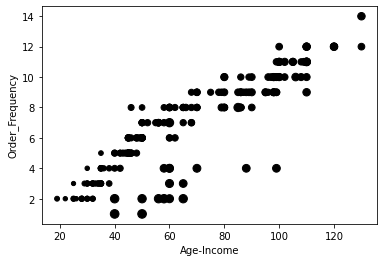

In [20]:
# Here is how it works

X = df[["Age","Income", "Order_Frequency"]]
#Visualise data points
plt.scatter(X["Income"],X["Order_Frequency"], X["Age"],c='black')
plt.xlabel("Age-Income")
plt.ylabel("Order_Frequency")
plt.show()

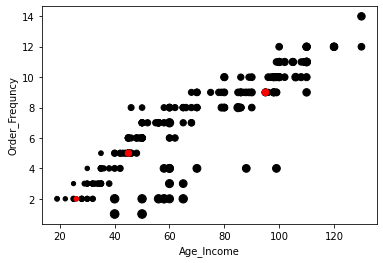

In [21]:
K=3
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Income"],X["Order_Frequency"],X["Age"],c='black')
plt.scatter(Centroids["Income"],Centroids["Order_Frequency"],Centroids["Age"],c='red')
plt.xlabel("Age_Income")
plt.ylabel("Order_Frequncy")
plt.show()

Remember: K-Means  is  a  typical  clustering  algorithm.  It  is popular, because  of it  is simple and fast.  A  set  of  n are  to  be partitioned  into  K  groups, that can be expressed njC j. The Euclidean distance between an object x in  group  j  and  the  corresponding cluster  centroid  Cj, can  be defined by number of K.
Instead j we can use m or s, etc, but in tradional stastics, i and j letters are used as  Xi... (instead of writing X1, X2,...), and the meanwhile, j represents a number of groups, for instance, we can write Kj (instead of writing K1, K2,...). Using the familiar symbols presumably makes the subject intersting and undertandable.

In [22]:
# Now, let define some conditions to implement the k-means Clustering algorithm. Here are steps:

# Step 1 - assign all the points to the closest cluster centroid
# Step 2 - compute centroids of newly formed clusters
# Step 3 - repeat step 1 and 2

# Definition as shown in Sharma's work

diff = 1
j=0
# XD = mean distance of a centroid to points, while X = values of column(s). 
# ED = Euclidean distance

# Let us execute step by step the three attribute data as indicated here:

while(diff!=0):
    XD=X    # In this case, mean distance of centroid to point is equal to X value.
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Income"]-row_d["Income"])**2
            d2=(row_c["Order_Frequency"]-row_d["Order_Frequency"])**2
            d3=(row_c["Age"]-row_d["Age"])**2
            d=np.sqrt(d1+d2+d3)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Income","Order_Frequency","Age"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new["Income"] - Centroids["Income"]).sum() + (Centroids_new["Order_Frequency"] - Centroids["Order_Frequency"]).sum() + (Centroids_new["Age"] - Centroids["Age"]).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Income","Order_Frequency","Age"]]

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


6.751490115800557
1.9179547250876543
0.0


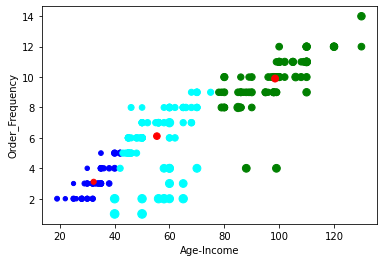

In [23]:
color=["blue","green","cyan"]
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Income"],data["Order_Frequency"],data["Age"],c=color[k])
plt.scatter(Centroids["Income"],Centroids["Order_Frequency"],Centroids["Age"],c="red")
plt.xlabel("Age-Income")
plt.ylabel("Order_Frequency")
plt.show()

### Determine Location, City or Neighborhood of Market Area
It is very important to determine the location of the market since the customer needs various location to location. For the same purpose, let us use location data obtained from venues explorations via Foursquare or other techniques.

Remember, the present data does not contain neighborhood lists, but zip code. Foursquare search to obtain neighborhoods via zip code had shown inaccurate latitude and longitude numbers. To determine the scope of the locations, search query has been used in the Foursquare location database, as illustrated below. The purpose of the map is to introduce potential readers with the location where the model project data was presumably obtained.  

In [24]:
# IMPORT ADDITIONAL LIBRARIES: 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Foursquare Credentails

In [25]:
CLIENT_ID = 'B0QDHAKICCF4YA3DKNB5YNOEJNACR5PXFUONV1YB3JIUHWAY' # your Foursquare ID
CLIENT_SECRET = 'QEKV5BXAIX2V55XXTIA1MLGVKGOYW1FKMOUGNE2SYCVYFTL0' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 80
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: B0QDHAKICCF4YA3DKNB5YNOEJNACR5PXFUONV1YB3JIUHWAY
CLIENT_SECRET:QEKV5BXAIX2V55XXTIA1MLGVKGOYW1FKMOUGNE2SYCVYFTL0


#### Location or Address

In [26]:
address = 'Irving, TX'
print('Irving, Hello')

Irving, Hello


In [27]:
geolocator = Nominatim(user_agent="TB2")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

32.8295183 -96.9442177


#### Define Search Query

In [28]:
search_query = 'Irving_Neighborhoods'
radius = 1000
print(search_query + ' .... Hello!')

Irving_Neighborhoods .... Hello!


In [29]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=B0QDHAKICCF4YA3DKNB5YNOEJNACR5PXFUONV1YB3JIUHWAY&client_secret=QEKV5BXAIX2V55XXTIA1MLGVKGOYW1FKMOUGNE2SYCVYFTL0&ll=32.8295183,-96.9442177&v=20180604&query=Irving_Neighborhoods&radius=1000&limit=80'

In [30]:
results = requests.get(url).json()

In [31]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id
0,5ede158f27ed9d75f78646ca,Spectrum Irving TX,"[{'id': '5453de49498eade8af355881', 'name': 'B...",v-1605317383,False,7777 N MacArthur Blvd,32.829657,-96.944497,"[{'label': 'display', 'lat': 32.82965650480955...",30,75063,US,Irving,TX,United States,"[7777 N MacArthur Blvd, Irving, TX 75063, Unit...",NaN,NaN
1,4b4cfd81f964a520d8c626e3,Irving High School,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1605317383,False,900 N O Connor Rd,32.824927,-96.950073,"[{'label': 'display', 'lat': 32.82492738541656...",749,75061,US,Irving,TX,United States,"[900 N O Connor Rd (W Union Bower Rd), Irving,...",W Union Bower Rd,NaN
2,4e02388c1f6ef39c2945a9f1,Irving Corps (The Salvation Army),"[{'id': '4bf58dd8d48988d132941735', 'name': 'C...",v-1605317383,False,250 E Grauwyler Rd,32.828673,-96.943205,"[{'label': 'display', 'lat': 32.82867299999999...",133,75061,US,Irving,TX,United States,"[250 E Grauwyler Rd, Irving, TX 75061, United ...",NaN,NaN
3,5f900b186fdafe412229ecb4,Irving Roof Repair Pros,"[{'id': '545419b1498ea6ccd0202f58', 'name': 'H...",v-1605317383,False,2734 W Shady Grove Rd,32.828611,-96.944915,"[{'label': 'display', 'lat': 32.8286107248011,...",120,75060,US,Irving,TX,United States,"[2734 W Shady Grove Rd, Irving, TX 75060, Unit...",NaN,NaN
4,5d8ec9d60190cd0008908470,Smart Techs Mac cellphone & computer repair Ir...,"[{'id': '4f04afc02fb6e1c99f3db0bc', 'name': 'M...",v-1605317383,False,259 E Grauwyler Rd 180,32.830328,-96.942900,"[{'label': 'display', 'lat': 32.83032830313751...",152,75061,US,Irving,TX,United States,"[259 E Grauwyler Rd 180, Irving, TX 75061, Uni...",NaN,581722886


In [32]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Spectrum Irving TX,Business Service,7777 N MacArthur Blvd,32.829657,-96.944497,"[{'label': 'display', 'lat': 32.82965650480955...",30,75063,US,Irving,TX,United States,"[7777 N MacArthur Blvd, Irving, TX 75063, Unit...",NaN,5ede158f27ed9d75f78646ca
1,Irving High School,High School,900 N O Connor Rd,32.824927,-96.950073,"[{'label': 'display', 'lat': 32.82492738541656...",749,75061,US,Irving,TX,United States,"[900 N O Connor Rd (W Union Bower Rd), Irving,...",W Union Bower Rd,4b4cfd81f964a520d8c626e3
2,Irving Corps (The Salvation Army),Church,250 E Grauwyler Rd,32.828673,-96.943205,"[{'label': 'display', 'lat': 32.82867299999999...",133,75061,US,Irving,TX,United States,"[250 E Grauwyler Rd, Irving, TX 75061, United ...",NaN,4e02388c1f6ef39c2945a9f1
3,Irving Roof Repair Pros,Home Service,2734 W Shady Grove Rd,32.828611,-96.944915,"[{'label': 'display', 'lat': 32.8286107248011,...",120,75060,US,Irving,TX,United States,"[2734 W Shady Grove Rd, Irving, TX 75060, Unit...",NaN,5f900b186fdafe412229ecb4
4,Smart Techs Mac cellphone & computer repair Ir...,Mobile Phone Shop,259 E Grauwyler Rd 180,32.830328,-96.942900,"[{'label': 'display', 'lat': 32.83032830313751...",152,75061,US,Irving,TX,United States,"[259 E Grauwyler Rd 180, Irving, TX 75061, Uni...",NaN,5d8ec9d60190cd0008908470


In [33]:
dataframe_filtered.drop(['crossStreet', 'labeledLatLngs', 'cc', 'formattedAddress'], axis =1, inplace = True)

In [34]:
dataframe_filtered.rename(columns = {'name': 'neighborhood','lat': 'latitude', 'lng': 'longtitude', 'postalCode': 'zip_code'}, inplace = True)
dataframe_filtered.head()

,neighborhood,categories,address,latitude,longtitude,distance,zip_code,city,state,country,id
0,Spectrum Irving TX,Business Service,7777 N MacArthur Blvd,32.829657,-96.944497,30,75063,Irving,TX,United States,5ede158f27ed9d75f78646ca
1,Irving High School,High School,900 N O Connor Rd,32.824927,-96.950073,749,75061,Irving,TX,United States,4b4cfd81f964a520d8c626e3
2,Irving Corps (The Salvation Army),Church,250 E Grauwyler Rd,32.828673,-96.943205,133,75061,Irving,TX,United States,4e02388c1f6ef39c2945a9f1
3,Irving Roof Repair Pros,Home Service,2734 W Shady Grove Rd,32.828611,-96.944915,120,75060,Irving,TX,United States,5f900b186fdafe412229ecb4
4,Smart Techs Mac cellphone & computer repair Ir...,Mobile Phone Shop,259 E Grauwyler Rd 180,32.830328,-96.942900,152,75061,Irving,TX,United States,5d8ec9d60190cd0008908470


In [35]:
# Groupby does not work with values of nan in the column(zip_code)
# so let convert it to dummy and then group it: 

irving = dataframe_filtered.replace({"zip_code": {np.nan: -1}}).groupby("zip_code").count()
irving.head()

,neighborhood,categories,address,latitude,longtitude,distance,city,state,country,id
zip_code,,,,,,,,,,
-1,7,6,0,7,7,7,6,7,7,7
75039,2,2,2,2,2,2,2,2,2,2
75060,1,1,1,1,1,1,1,1,1,1
75061,18,17,16,18,18,18,18,18,18,18
75062,6,6,5,6,6,6,6,6,6,6


 Let's find out how many unique categories can be curated from all the returned venues

In [36]:
print('There are {} uniques neighborhood.'.format(len(irving['neighborhood'].unique())))

There are 5 uniques neighborhood.


In [37]:
# one hot encoding
irving_onehot = pd.get_dummies(irving[['neighborhood']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
irving_onehot['categories'] = irving['categories'] 

# move neighborhood column to the first column
fixed_columns = [irving_onehot.columns[-1]] + list(irving_onehot.columns[:-1])
irving_onehot = irving_onehot[fixed_columns]

irving_onehot.head()

,categories,neighborhood
zip_code,,
-1,6,7
75039,2,2
75060,1,1
75061,17,18
75062,6,6


Here, categories of venues found in the zip codes of neighborhoods varies. The neighborhoods with the zip codes of 75061 is a large, which is 17, compare to zip 75060 with 1 category. 

In the next time, Model, Part-3 and Part-4 will be published consecutively. Part-3 is the Model constructed on Regression analysis and Part-4 is Logistic Regression, which applies a Machine Learning classification methodology on the same data. 